In [1]:
!python -V

Python 3.7.13


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.activations import relu, tanh, sigmoid, softmax

In [17]:
crop_data = pd.read_csv('/tmp/Crop_recommendation.csv')
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
crop_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

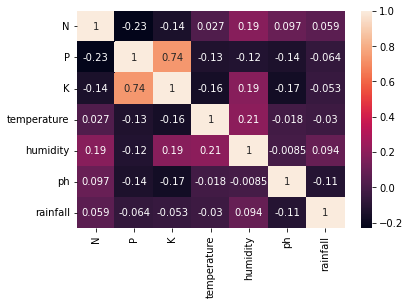

In [7]:
sns.heatmap(crop_data.corr(), annot=True)

See that Phosporus (P) has relatively high correlation with Potassium (K).

In [8]:
print('There are {} unique labels for crop recommendation dataset'.format(len(crop_data['label'].unique())))

There are 22 unique labels for crop recommendation dataset


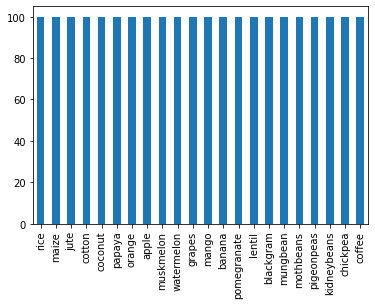

In [9]:
# Distribution of Crop Recommendation Dataset's Label
crop_data['label'].value_counts().plot(kind='bar')

## Nitrogen, Phosporus, Potassium

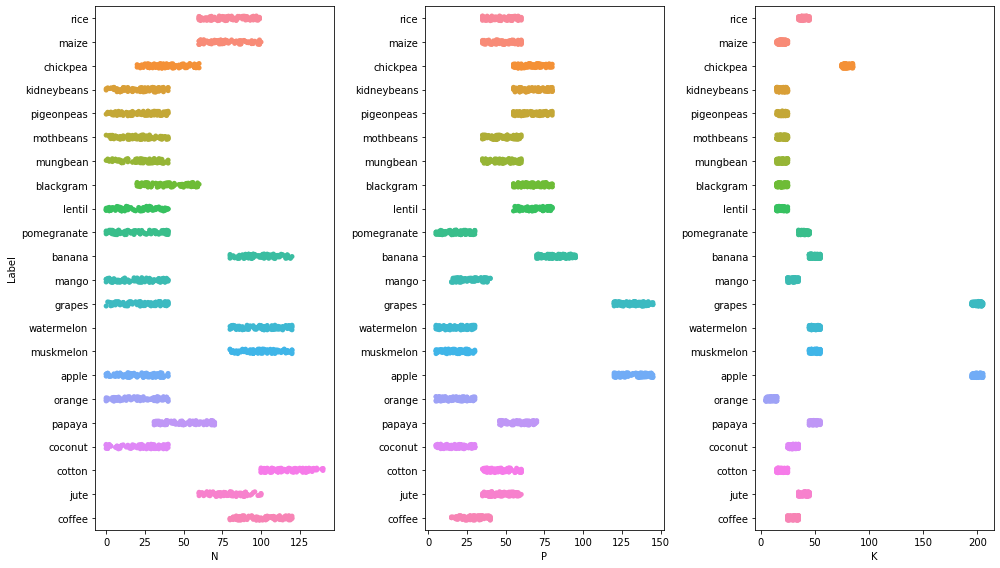

In [10]:
fig, axs = plt.subplots(1,3, figsize=(14,8))
sns.stripplot(x=crop_data['N'], y=crop_data['label'], ax=axs[0])
sns.stripplot(x=crop_data['P'], y=crop_data['label'], ax=axs[1])
sns.stripplot(x=crop_data['K'], y=crop_data['label'], ax=axs[2])
axs[0].set_xlabel('N')
axs[0].set_ylabel('Label')
axs[1].set_xlabel('P')
axs[1].set_ylabel('')
axs[2].set_xlabel('K')
axs[2].set_ylabel('')
fig.tight_layout()
plt.show()

Based on the dataset, stated that Cotton contains Nitrogen the most among the other unique crops. Then, some of crops are relatively categorized in one class. Also, apple and grapes contain high Phosporus and Potassium.

Text(0.5, 1.0, 'High Consentrated Phosporus and Potassium Crops')

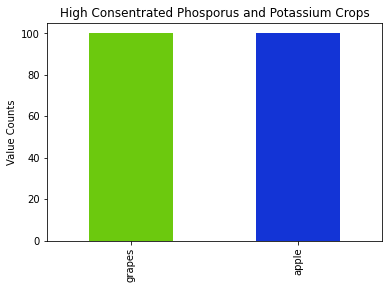

In [11]:
apple_and_grapes = crop_data[crop_data['label'].isin(['apple', 'grapes'])]
apple_and_grapes['label'].value_counts().plot(kind='bar', color=['#6cc90e', '#1334d6']).set_ylabel('Value Counts')
apple_and_grapes['label'].value_counts().plot(kind='bar', color=['#6cc90e', '#1334d6']).set_title('High Consentrated Phosporus and Potassium Crops')

## Temperature, Humidity, Ph, Rainfall

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

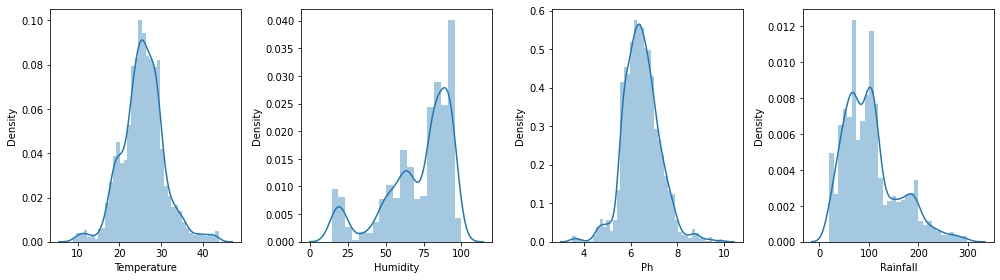

In [12]:
fig2, axs2 = plt.subplots(1, 4, figsize=(14,4))
for i in range(4):
    column_th = crop_data.columns[i+3]
    sns.distplot(crop_data[column_th], ax=axs2[i])
    axs2[i].set_xlabel(column_th.capitalize())
plt.tight_layout()
plt.show()

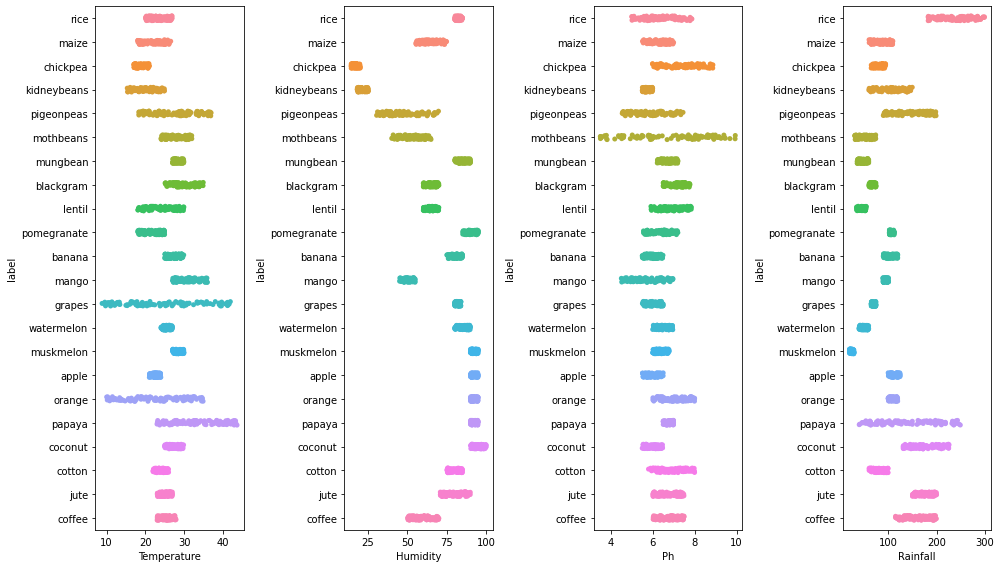

In [13]:
fig3, axs3 = plt.subplots(1, 4, figsize=(14,8))
for i in range(4):
    column_th = crop_data.columns[i+3]
    sns.stripplot(x=crop_data[column_th], y=crop_data['label'], ax=axs3[i])
    axs3[i].set_xlabel(column_th.capitalize())
plt.tight_layout()
plt.show()

## Build the Model

In [18]:
features = ['temperature', 'humidity', 'rainfall']

dataset = crop_data
y = dataset.pop('label')
X = pd.DataFrame([dataset.pop(x) for x in features]).T

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print('Num Label: ', y)
print('Word Label: ', le.inverse_transform(y))
# See the first 5 observations of X and y
# X.head()
# y.head()

Num Label:  [20 20 20 ...  5  5  5]
Word Label:  ['rice' 'rice' 'rice' ... 'coffee' 'coffee' 'coffee']


In [20]:
# Perform splitting training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Number of training data: ', X_train.shape[0])
print('Number of testing data: ', X_test.shape[0])

Number of training data:  1760
Number of testing data:  440


In [21]:
# Show first 5 data of training
X_train.head()

# Show first 5 data of testing
#X_test.head()

,temperature,humidity,rainfall
1656,16.396243,92.181519,102.944161
752,27.543848,69.347863,69.408782
892,27.521856,63.132153,45.208411
1041,25.360592,75.031933,116.553145
1179,35.474783,47.972305,97.790725


In [22]:
# Perform feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Hyperparameter Tuning

In [31]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [32]:

def create_model(layers, activation):
    model = Sequential()
    for i, neurons in enumerate(layers):
        if i==0:
            model.add(Dense(neurons, input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(neurons))
            model.add(Activation(activation))
    model.add(Dense(22, activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model, verbose=0)

print('')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [35]:

layers = [[16, 32, 64], [32, 32, 32], [32, 32, 64], [64, 64, 64], [32, 64, 128], [64, 64, 128]]
activations = ['relu', 'tanh']
param_grid = dict(layers=layers, activation=activations, batch_size=[32, 64], epochs=[70])
grid = GridSearchCV(estimator=model, param_grid=param_grid)


grid_result = grid.fit(X_train, y_train)

[grid_result.best_score_, grid_result.best_params_]

print([grid_result.best_score_, grid_result.best_params_])

[0.8909090876579284, {'activation': 'relu', 'batch_size': 32, 'epochs': 70, 'layers': [32, 32, 64]}]


In [36]:
model = Sequential([
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(22, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [37]:
# Fitting the model
# Note: Change verbose to 1, to see fitting details per epoch

history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), batch_size=32, verbose = 1)

Epoch 1/300
55/55 [==============================] - 1s 6ms/step - loss: 2.9249 - accuracy: 0.1165 - val_loss: 2.6731 - val_accuracy: 0.2568
Epoch 2/300
55/55 [==============================] - 0s 3ms/step - loss: 2.3005 - accuracy: 0.3119 - val_loss: 1.8826 - val_accuracy: 0.4205
Epoch 3/300
55/55 [==============================] - 0s 3ms/step - loss: 1.5453 - accuracy: 0.4949 - val_loss: 1.2899 - val_accuracy: 0.5864
Epoch 4/300
55/55 [==============================] - 0s 3ms/step - loss: 1.1256 - accuracy: 0.6199 - val_loss: 1.0473 - val_accuracy: 0.6227
Epoch 5/300
55/55 [==============================] - 0s 2ms/step - loss: 0.9352 - accuracy: 0.6778 - val_loss: 0.9225 - val_accuracy: 0.6568
Epoch 6/300
55/55 [==============================] - 0s 2ms/step - loss: 0.8378 - accuracy: 0.6977 - val_loss: 0.8301 - val_accuracy: 0.6773
Epoch 7/300
55/55 [==============================] - 0s 2ms/step - loss: 0.7589 - accuracy: 0.7239 - val_loss: 0.7820 - val_accuracy: 0.7205
Epoch 8/300
5

In [45]:
# Save and convert the model
import pathlib

export_dir = '/tmp/'
tf.saved_model.save(model, export_dir=export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
# converter.optimizations = [optimization]

tflite_model = converter.convert()

tflite_model_file = pathlib.Path('/tmp/reduction-crop-recommendation-prediction.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: /tmp/assets


INFO:tensorflow:Assets written to: /tmp/assets


19048

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# List all metrics
metrics = [acc, val_acc, loss, val_loss]
names = ['Training Accuracy', 'Testing Accuracy', 'Training Loss', 'Testing Loss']

for i in range(len(metrics)):
    print ('Final {}: {:.3f}'.format(names[i], metrics[i][-1]))

Final Training Accuracy: 0.930
Final Testing Accuracy: 0.889
Final Training Loss: 0.182
Final Testing Loss: 0.349


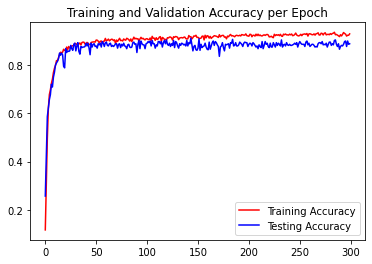

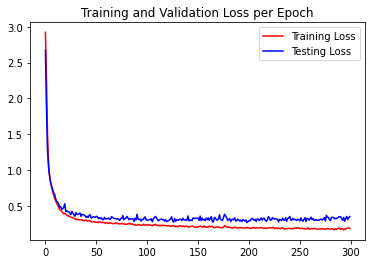

In [39]:
# Initialize x-axis and its naught value

epochs = range(len(acc))
start = 0 # Change 'start' variable to change the naught value
end = epochs[-1] + 1

# Plot training and validation accuracy per epoch
plt.plot(epochs[start:end], acc[start:end], 'r', label='Training Accuracy')
plt.plot(epochs[start:end], val_acc[start:end], 'b', label='Testing Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend(loc=0)
plt.show()

# Plot training and validation loss per epoch
plt.plot(epochs[start:end], loss[start:end], 'r', label='Training Loss')
plt.plot(epochs[start:end], val_loss[start:end], 'b', label='Testing Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend(loc=0)
plt.show()

## Only Sort Output Based on Probability

In [40]:
# Prediction only applied for Scalable Data
def scaled_predict(inputs, threshold=0.1):
    
    counter = 0
    
    # Get all probabilities for each label
    y_pred = model.predict(inputs)
    
    # Insert corresponding label to labels list
    for probs in y_pred:
        counter += 1
        
        # List of labels that transcend some threshold
        index = np.where(probs > threshold)[0]
        print('Recommendation {}: {}'.format(counter, ', '.join(le.inverse_transform(index))))
        
# Prediction only applied before data scalable        
def predict(inputs, threshold=0.1):
    
    # Feature Scaling by StandardScaler
    inputs = sc.transform(inputs)
    
    # Use scaled_predict function
    scaled_predict(inputs, threshold)

In [41]:
scaled_predict(X_test)

Recommendation 1: muskmelon
Recommendation 2: watermelon
Recommendation 3: papaya
Recommendation 4: orange
Recommendation 5: apple
Recommendation 6: mango
Recommendation 7: apple, orange, pomegranate
Recommendation 8: mothbeans
Recommendation 9: mungbean
Recommendation 10: lentil
Recommendation 11: blackgram
Recommendation 12: coconut
Recommendation 13: pomegranate
Recommendation 14: jute
Recommendation 15: coconut
Recommendation 16: orange, papaya, pomegranate
Recommendation 17: apple, orange, pomegranate
Recommendation 18: maize
Recommendation 19: coconut, papaya
Recommendation 20: muskmelon
Recommendation 21: coffee
Recommendation 22: papaya
Recommendation 23: orange
Recommendation 24: coconut, papaya
Recommendation 25: chickpea, kidneybeans
Recommendation 26: jute
Recommendation 27: mungbean, watermelon
Recommendation 28: orange
Recommendation 29: coffee
Recommendation 30: jute, rice
Recommendation 31: orange, pomegranate
Recommendation 32: lentil, mothbeans
Recommendation 33: jute

## Sorting Probabilities and Corresponding Index

In [42]:
# Prediction only applied for Scalable Data
def scaled_predict(inputs):
    
    counter = 0
    
    # Get all probabilities for each label
    y_pred = model.predict(inputs)
    
    # Insert corresponding label to labels list
    for probs in y_pred:
        counter += 1 
        
        index = [i for i in range(len(probs))]
        
        # Sorted probs (descending)
        sorted_probs = list(np.sort(probs)[::-1])
        
        # Convert np.array probs to list
        probs = list(probs)
        
        # Indexes after sorted by probs
        sorted_index = [probs.index(prob) for prob in sorted_probs]
        
        print('Recommendation {}: {}'.format(counter, ', '.join(le.inverse_transform(sorted_index))))
        print('Probabilities: {}'.format(sorted_probs))
        print('')
        
# Prediction only applied before data scalable        
def predict(inputs, threshold=0.1):
    
    # Feature Scaling by StandardScaler
    inputs = sc.transform(inputs)
    
    # Use scaled_predict function
    scaled_predict(inputs, threshold)

In [43]:
# Test it for yourself

scaled_predict(X_test)

Recommendation 1: muskmelon, mungbean, papaya, watermelon, orange, grapes, cotton, mothbeans, blackgram, apple, apple, apple, apple, apple, apple, apple, apple, apple, apple, apple, apple, apple
Probabilities: [0.9999057, 9.392223e-05, 4.0042303e-07, 2.2084405e-12, 1.4182216e-24, 1.6548997e-28, 1.1341746e-30, 3.2338063e-33, 4.223972e-34, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Recommendation 2: watermelon, mungbean, cotton, grapes, papaya, orange, muskmelon, blackgram, mothbeans, lentil, maize, banana, pigeonpeas, kidneybeans, apple, pomegranate, chickpea, chickpea, chickpea, chickpea, chickpea, chickpea
Probabilities: [0.9999646, 3.425548e-05, 7.1041643e-07, 2.9735378e-07, 9.2315794e-08, 2.8651257e-13, 5.3350624e-14, 7.277538e-17, 3.7964202e-17, 4.3436066e-19, 2.6092862e-19, 1.84686e-21, 6.626408e-22, 1.8969147e-27, 4.729804e-33, 4.974121e-34, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Recommendation 3: papaya, orange, grapes, coconut, banana, pigeonpeas, blackgram, pome